In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
data1 = pd.read_csv("/content/drive/MyDrive/DATASETS/studentData.csv", sep = ';')
data1.head()

,AcademicYear,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,SelfRegulation,StudyEffort,StudyTime,Openness,Conscientiousness,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,Sex,Age,Discipline,Course,Modality,LearningStyle,id,Label
0,2017.0,7.2,7.5,5.2,8.9,NaN,4.4,5.3,7.9,6.6,67.9,74.0,63.0,male,19.0,Business,BusinessWithIT,Visual,Deep,1,Pass
1,2017.0,6.6,5.5,2.3,2.8,NaN,3.1,4.4,2.8,3.3,66.1,63.0,54.0,male,19.0,Business,BusinessWithIT,Kinaesthetic,Strategic,4,Fail
2,2017.0,8.5,2.3,4.3,4.3,NaN,6.3,5.3,3.9,4.9,57.3,63.0,48.0,male,22.0,Computing,Computing,Visual,Shallow,5,Fail
3,2017.0,9.1,6.7,4.6,5.1,NaN,6.6,6.9,4.0,5.6,52.5,55.0,43.0,male,18.0,Computing,Computing,Visual,Shallow,6,Fail
4,2017.0,7.1,0.8,4.7,3.8,NaN,6.4,5.6,4.2,4.9,66.6,71.0,51.0,male,24.0,Computing,Computing,Visual,Shallow,10,Fail


In [15]:
data1.shape

(1240, 21)

In [16]:
data1['Label'].value_counts()

Pass    721
Fail    519
Name: Label, dtype: int64

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcademicYear         1235 non-null   float64
 1   ExtrinsicMotivation  1239 non-null   float64
 2   GroupWork            1239 non-null   float64
 3   IntrinsicMotivation  1238 non-null   float64
 4   SelfEfficacy         1239 non-null   float64
 5   SelfRegulation       304 non-null    float64
 6   StudyEffort          1239 non-null   float64
 7   StudyTime            1238 non-null   float64
 8   Openness             1240 non-null   float64
 9   Conscientiousness    1240 non-null   float64
 10  HighSchoolAverage    1235 non-null   float64
 11  HighSchoolEnglish    1235 non-null   float64
 12  HighSchoolMaths      1235 non-null   float64
 13  Sex                  1235 non-null   object 
 14  Age                  1235 non-null   float64
 15  Discipline           1235 non-null   o

In [18]:
data1.isnull().sum()

AcademicYear             5
ExtrinsicMotivation      1
GroupWork                1
IntrinsicMotivation      2
SelfEfficacy             1
SelfRegulation         936
StudyEffort              1
StudyTime                2
Openness                 0
Conscientiousness        0
HighSchoolAverage        5
HighSchoolEnglish        5
HighSchoolMaths          5
Sex                      5
Age                      5
Discipline               5
Course                   5
Modality               106
LearningStyle            0
id                       0
Label                    0
dtype: int64

In [19]:
# Drop the columns which is not relevant

data1 = data1.drop(columns=['id', 'AcademicYear'])

In [20]:
data1.head()

,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,SelfRegulation,StudyEffort,StudyTime,Openness,Conscientiousness,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,Sex,Age,Discipline,Course,Modality,LearningStyle,Label
0,7.2,7.5,5.2,8.9,NaN,4.4,5.3,7.9,6.6,67.9,74.0,63.0,male,19.0,Business,BusinessWithIT,Visual,Deep,Pass
1,6.6,5.5,2.3,2.8,NaN,3.1,4.4,2.8,3.3,66.1,63.0,54.0,male,19.0,Business,BusinessWithIT,Kinaesthetic,Strategic,Fail
2,8.5,2.3,4.3,4.3,NaN,6.3,5.3,3.9,4.9,57.3,63.0,48.0,male,22.0,Computing,Computing,Visual,Shallow,Fail
3,9.1,6.7,4.6,5.1,NaN,6.6,6.9,4.0,5.6,52.5,55.0,43.0,male,18.0,Computing,Computing,Visual,Shallow,Fail
4,7.1,0.8,4.7,3.8,NaN,6.4,5.6,4.2,4.9,66.6,71.0,51.0,male,24.0,Computing,Computing,Visual,Shallow,Fail


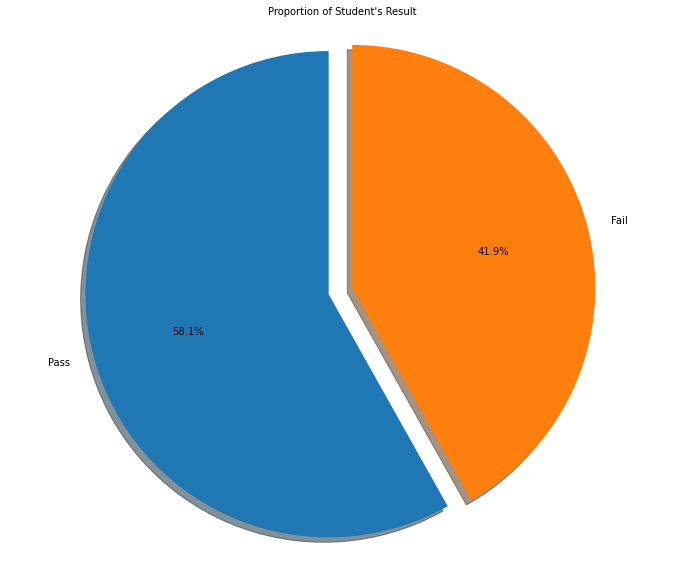

In [21]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Pass', 'Fail'
sizes = [data1.Label[data1['Label']=='Pass'].count(), data1.Label[data1['Label']=='Fail'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Student's Result", size = 10)
plt.show()

In [22]:
data1.dtypes

ExtrinsicMotivation    float64
GroupWork              float64
IntrinsicMotivation    float64
SelfEfficacy           float64
SelfRegulation         float64
StudyEffort            float64
StudyTime              float64
Openness               float64
Conscientiousness      float64
HighSchoolAverage      float64
HighSchoolEnglish      float64
HighSchoolMaths        float64
Sex                     object
Age                    float64
Discipline              object
Course                  object
Modality                object
LearningStyle           object
Label                   object
dtype: object

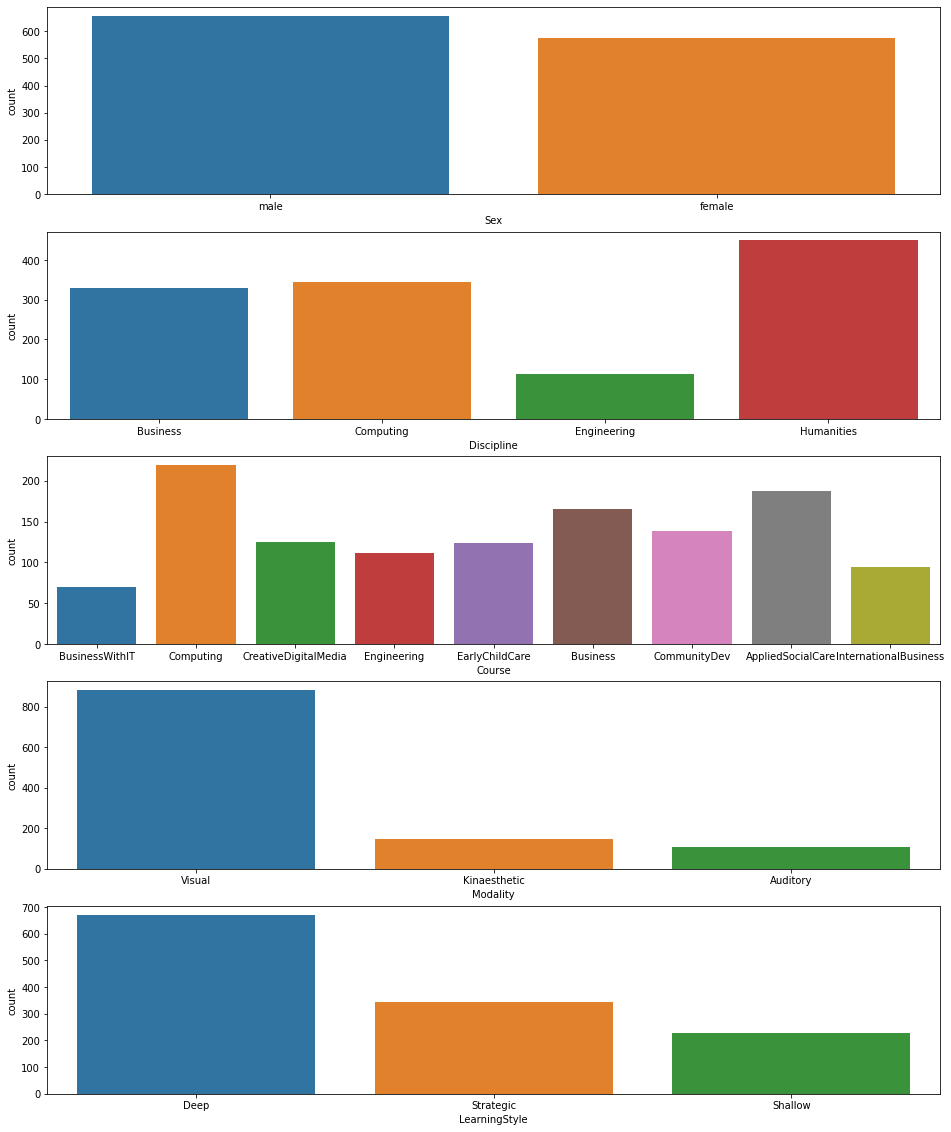

In [23]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16, 20))

cols_ = ["Sex", "Discipline", "Course", "Modality", "LearningStyle"]

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data1, ax=ax[ind])

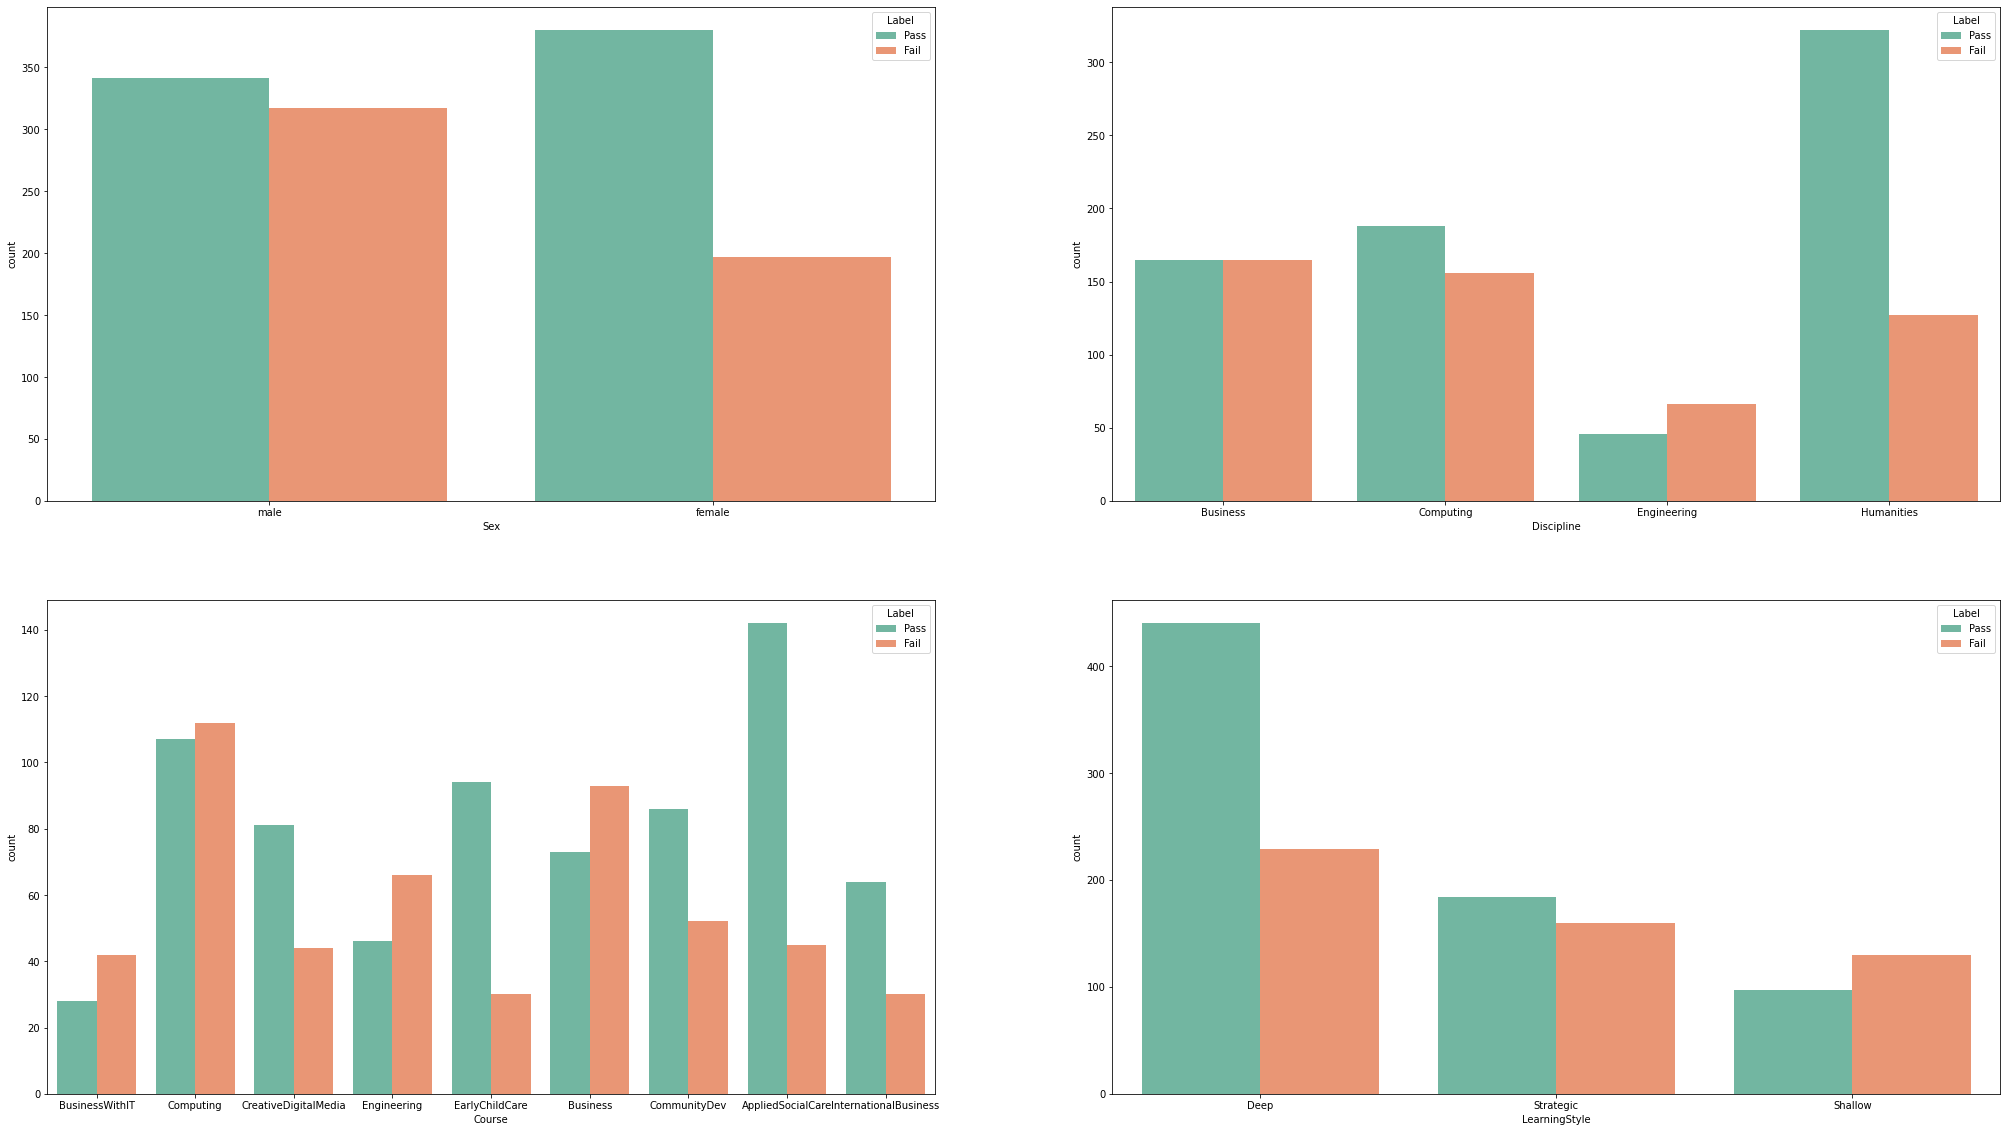

In [24]:
# Count column plots to map the dependence of 'Label' column on categorical features

fig, ax = plt.subplots(2, 2, figsize=(35, 20))

sns.countplot(x='Sex', hue='Label', data=data1, palette='Set2', ax=ax[0][0])
sns.countplot(x='Discipline', hue='Label', data=data1, palette='Set2', ax=ax[0][1])
sns.countplot(x='Course', hue='Label', data=data1, palette='Set2', ax=ax[1][0])
sns.countplot(x='LearningStyle', hue='Label', data=data1, palette='Set2', ax=ax[1][1])

plt.show()

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_cols = data1.select_dtypes(include=numerics)

In [26]:
num_cols

,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,SelfRegulation,StudyEffort,StudyTime,Openness,Conscientiousness,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,Age
0,7.2,7.5,5.2,8.9,NaN,4.4,5.3,7.9,6.6,67.9,74.0,63.0,19.0
1,6.6,5.5,2.3,2.8,NaN,3.1,4.4,2.8,3.3,66.1,63.0,54.0,19.0
2,8.5,2.3,4.3,4.3,NaN,6.3,5.3,3.9,4.9,57.3,63.0,48.0,22.0
3,9.1,6.7,4.6,5.1,NaN,6.6,6.9,4.0,5.6,52.5,55.0,43.0,18.0
4,7.1,0.8,4.7,3.8,NaN,6.4,5.6,4.2,4.9,66.6,71.0,51.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1.8,9.7,5.6,NaN,NaN,6.9,2.4,4.0,1.9,NaN,NaN,NaN,NaN
1236,8.6,7.5,4.5,5.8,NaN,8.2,NaN,1.1,6.2,NaN,NaN,NaN,NaN
1237,9.0,NaN,NaN,8.2,NaN,NaN,8.3,6.8,5.5,NaN,NaN,NaN,NaN
1238,7.0,6.4,1.8,6.2,NaN,4.8,NaN,9.2,2.1,NaN,NaN,NaN,NaN


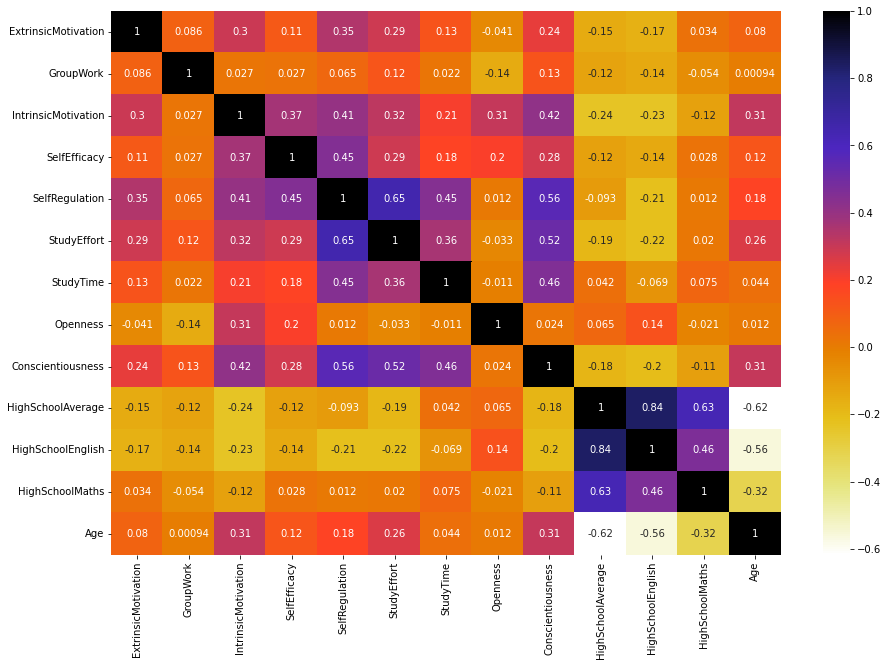

In [46]:
# Displaying Correlation between varaibles using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
cor = num_cols.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**Handle Missing Values**

In [49]:
data1['Sex'].fillna(data1['Sex'].mode()[0], inplace=True) # Mode
data1['Discipline'].fillna(data1['Discipline'].mode()[0], inplace=True) # Mode
data1['Course'].fillna(data1['Course'].mode()[0], inplace=True) # Mode
data1['Modality'].fillna(data1['Modality'].mode()[0], inplace=True) # Mode

data1['Age'].fillna(data1['Age'].mean(), inplace=True) # Mean
data1['HighSchoolMaths'].fillna(data1['HighSchoolMaths'].mean(), inplace=True) # Mean
data1['HighSchoolEnglish'].fillna(data1['HighSchoolEnglish'].mean(), inplace=True) # Mean
data1['HighSchoolAverage'].fillna(data1['HighSchoolAverage'].mean(), inplace=True) # Mean
data1['StudyTime'].fillna(data1['StudyTime'].mean(), inplace=True) # Mean
data1['StudyEffort'].fillna(data1['StudyEffort'].mean(), inplace=True) # Mean
data1['SelfEfficacy'].fillna(data1['SelfEfficacy'].mean(), inplace=True) # Mean
data1['IntrinsicMotivation'].fillna(data1['IntrinsicMotivation'].mean(), inplace=True) # Mean
data1['GroupWork'].fillna(data1['GroupWork'].mean(), inplace=True) # Mean
data1['ExtrinsicMotivation'].fillna(data1['ExtrinsicMotivation'].mean(), inplace=True) # Mean

In [30]:
data1.isnull().sum()

ExtrinsicMotivation      0
GroupWork                0
IntrinsicMotivation      0
SelfEfficacy             0
SelfRegulation         936
StudyEffort              0
StudyTime                0
Openness                 0
Conscientiousness        0
HighSchoolAverage        0
HighSchoolEnglish        0
HighSchoolMaths          0
Sex                      0
Age                      0
Discipline               0
Course                   0
Modality                 0
LearningStyle            0
Label                    0
dtype: int64

In [31]:
data1 = data1.drop(columns=['SelfRegulation'])

In [32]:
data1.head()

,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,StudyEffort,StudyTime,Openness,Conscientiousness,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,Sex,Age,Discipline,Course,Modality,LearningStyle,Label
0,7.2,7.5,5.2,8.9,4.4,5.3,7.9,6.6,67.9,74.0,63.0,male,19.0,Business,BusinessWithIT,Visual,Deep,Pass
1,6.6,5.5,2.3,2.8,3.1,4.4,2.8,3.3,66.1,63.0,54.0,male,19.0,Business,BusinessWithIT,Kinaesthetic,Strategic,Fail
2,8.5,2.3,4.3,4.3,6.3,5.3,3.9,4.9,57.3,63.0,48.0,male,22.0,Computing,Computing,Visual,Shallow,Fail
3,9.1,6.7,4.6,5.1,6.6,6.9,4.0,5.6,52.5,55.0,43.0,male,18.0,Computing,Computing,Visual,Shallow,Fail
4,7.1,0.8,4.7,3.8,6.4,5.6,4.2,4.9,66.6,71.0,51.0,male,24.0,Computing,Computing,Visual,Shallow,Fail


In [33]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Sex', 'Discipline', 'Course', 'Modality', 'LearningStyle', 'Label']
le = LabelEncoder()
for col in feature_col:
  data1[col] = le.fit_transform(data1[col])

In [34]:
data1.head()

,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,StudyEffort,StudyTime,Openness,Conscientiousness,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,Sex,Age,Discipline,Course,Modality,LearningStyle,Label
0,7.2,7.5,5.2,8.9,4.4,5.3,7.9,6.6,67.9,74.0,63.0,1,19.0,0,2,2,0,1
1,6.6,5.5,2.3,2.8,3.1,4.4,2.8,3.3,66.1,63.0,54.0,1,19.0,0,2,1,2,0
2,8.5,2.3,4.3,4.3,6.3,5.3,3.9,4.9,57.3,63.0,48.0,1,22.0,1,4,2,1,0
3,9.1,6.7,4.6,5.1,6.6,6.9,4.0,5.6,52.5,55.0,43.0,1,18.0,1,4,2,1,0
4,7.1,0.8,4.7,3.8,6.4,5.6,4.2,4.9,66.6,71.0,51.0,1,24.0,1,4,2,1,0


In [50]:
########## Split Features and Target Varible ############
X = data1.drop('Label', axis = 1)
y = data1['Label']

In [51]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =10)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((992, 17), (248, 17), (992,), (248,))

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
from sklearn import metrics

k_range = list(range(3, 12))
acc = []
for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
    
acc

[0.8104838709677419,
 0.8064516129032258,
 0.7943548387096774,
 0.782258064516129,
 0.782258064516129,
 0.7903225806451613,
 0.782258064516129,
 0.7782258064516129,
 0.7903225806451613]

In [40]:
knn_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
pred = knn_model.predict(X_test)

In [41]:
metrics.accuracy_score(y_test, pred)

0.8104838709677419

In [42]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [43]:
y_pred = clf.predict(X_test)

In [44]:
metrics.accuracy_score(y_test, y_pred)

0.6975806451612904